In [39]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Metodo con il contesto `with` (raccomandato)
file_path = "/home/acarugat/Giuli.txt"

# Leggi il contenuto del file
with open(file_path, 'r', encoding='utf-8') as file:
    testo = file.read()

#print(testo)  # Stampa il contenuto del file

# Pulizia del testo
stop_words = set(stopwords.words('italian'))
tokens = word_tokenize(testo.lower())
tokens_puliti = [word for word in tokens if word not in stop_words and word not in string.punctuation]

print(tokens_puliti)


['comincio', 'leggere', 'parte', 'po', '’', 'teoretica', 'conoscenza', 'proprio', 'tempo', 'appreso', 'pensiero', 'appresta', 'immaginare', 'orientamento', '’', 'azione', 'culturale', 'nazionale', 'può', 'muovere', 'prendere', 'misure', 'mondo', 'entrato', 'dimensione', 'compiuta', 'tecnica', 'accelerazioni', 'movimento', 'cose', 'così', 'vorticoso', 'improvviso', 'così', 'radicale', 'implicazioni', 'applicazioni', 'persino', 'sistema', 'processi', 'cognitivi', 'persone', 'solo', 'ultime', 'generazioni', 'cominciato', 'mutare', 'esso', 'fronte', 'cambiamento', 'paradigma', 'quarta', 'rivoluzione', 'epocale', 'storia', 'delineante', '’', 'ontologia', 'intonata', 'rivoluzione', 'permanente', '’', 'infosfera', 'globale', 'rischio', 'corre', 'duplice', 'speculare', '’', 'entusiasmo', 'passivo', 'rimuove', 'pericoli', 'iper-tecnologizzazione', 'converso', '’', 'apocalittismo', 'difensivo', 'rimpiange', '’', 'immagine', 'mondo', 'trascorsa', 'impugnando', '’', 'ideologia', 'crisi', 'percepis

In [40]:
from gensim.models import Word2Vec

# Addestramento di Word2Vec
model = Word2Vec([tokens_puliti], vector_size=100, window=5, min_count=1, max_vocab_size=100, workers=4)
print (model)

# Salva il modello
model.save("word2vec_model")


Word2Vec<vocab=317, vector_size=100, alpha=0.025>


In [41]:
# Parole simili
parole_simili = model.wv.most_similar('conoscenza', topn=5)
print(parole_simili)


[('posso', 0.26375532150268555), ('mai', 0.24909467995166779), ('sciocche', 0.21881747245788574), ("l'anima", 0.2112695872783661), ('bello', 0.2084978073835373)]


In [42]:
# Ottieni le parole nel vocabolario e le loro frequenze
parole = model.wv.index_to_key[:100]  # Prime 100 parole più frequenti

# Stampa le parole con le loro frequenze
print("Parola - Frequenza")
for parola in parole:
    frequenza = model.wv.get_vecattr(parola, "count")  # Frequenza della parola
    print(f"{parola} - {frequenza}")


# Ottieni i vettori corrispondenti
vettori = [model.wv[word] for word in parole]

Parola - Frequenza
’ - 9
ciò - 5
l'acqua - 5
dell'acqua - 5
cultura - 5
così - 4
venezia - 4
cioè - 4
qui - 4
può - 4
naturalmente - 3
dopo - 3
pietrangelo - 3
amniotico - 3
liquido - 3
grande - 3
acqua - 3
corpo - 3
rivista - 3
attraverso - 3
quindi - 3
civiltà - 3
l'importanza - 2
presidente - 2
storia - 2
disidratano - 2
rivoluzione - 2
persone - 2
saluto - 2
talmente - 2
dell'imparare - 2
fa - 2
detto - 2
prima - 2
punto - 2
vero - 2
nuovo - 2
ora - 2
biennale - 2
bellezza - 2
giorno - 2
estetica - 2
po - 2
problema - 2
quando - 2
rappresenta - 2
l'elemento - 2
lezione - 2
immaginare - 2
alberi - 2
esempio - 2
nasce - 2
mondo - 2
figli - 2
ricordarsi - 2
tecnica - 2
umano - 2
creatività - 2
sottolineare - 2
esco - 1
innanzitutto - 1
incantato - 1
luoghi - 1
funzione - 1
letteralmente - 1
buttafuoco - 1
protocollo - 1
egregio - 1
pubblica - 1
passo - 1
desertificazione - 1
riferimento - 1
l'altro - 1
conclusa - 1
grandissima - 1
dato - 1
chaouni - 1
aziza - 1
l'architetto - 1
traspo

In [43]:
import numpy as np

def vettore_medio(parole, modello):
    vettori = [modello.wv[word] for word in parole if word in modello.wv]
    return np.mean(vettori, axis=0) if vettori else np.zeros(modelo.vector_size)

# Calcola il vettore medio per un documento
vettore_doc = vettore_medio(tokens_puliti, model)


317


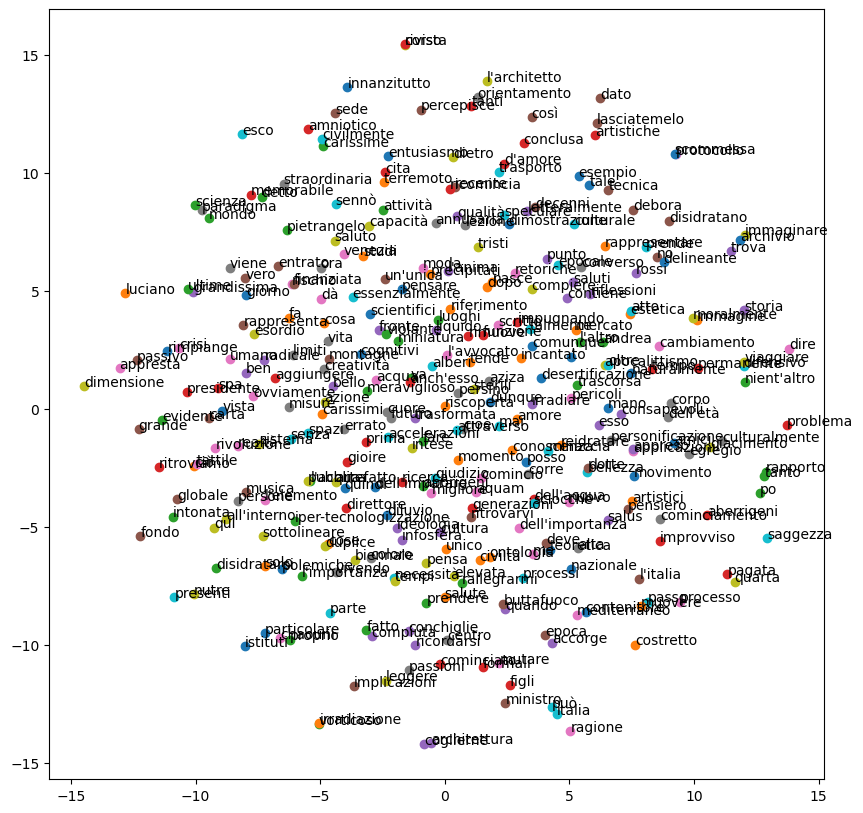

In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Riduzione dimensionale
vettori = model.wv[model.wv.index_to_key]
print(len(model.wv.index_to_key))
tsne = TSNE(n_components=2, random_state=0)

vettori_ridotti = tsne.fit_transform(vettori)

# Visualizzazione
plt.figure(figsize=(10, 10))
for i, word in enumerate(model.wv.index_to_key):
    plt.scatter(vettori_ridotti[i, 0], vettori_ridotti[i, 1])
    plt.annotate(word, (vettori_ridotti[i, 0], vettori_ridotti[i, 1]))
plt.show()


In [45]:
from sklearn.cluster import KMeans

# Imposta il numero di cluster
num_clusters = 10

# Esegui il clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(vettori)

# Ottieni i cluster
clusters = kmeans.labels_


/home/acarugat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
# Raggruppa le parole per cluster
cluster_parole = {i: [] for i in range(num_clusters)}
for parola, cluster in zip(parole, clusters):
    cluster_parole[cluster].append(parola)

# Visualizza i cluster
for cluster, parole in cluster_parole.items():
    print(f"Cluster {cluster}: {parole}")


Cluster 0: ['cultura', 'giorno', 'alberi', 'particolare', "l'avvocato", 'carissime', 'passioni']
Cluster 1: ['ciò', 'grande', "l'importanza", 'presidente', 'detto', 'vero', 'creatività', 'dato', 'crisi']
Cluster 2: ['liquido', 'acqua', 'corpo', 'rivista', 'esco', 'luoghi', 'egregio', 'passo', 'andrea', 'tristi', 'amici']
Cluster 3: ["l'acqua", 'così', 'quindi', "dell'imparare", 'nuovo', 'biennale', 'quando', 'ricordarsi', 'sottolineare', 'incantato', 'buttafuoco', 'pubblica', 'conclusa', 'direttore', 'carissimi']
Cluster 4: ['’', "dell'acqua", 'dopo', 'storia', 'talmente', 'punto', 'estetica', 'po', 'problema', 'letteralmente', 'riferimento', "l'altro", 'mercato', 'presenti', 'formali']
Cluster 5: ['pietrangelo', 'civiltà', 'grandissima']
Cluster 6: ['amniotico', 'disidratano', 'prima', 'nasce', 'funzione', 'chaouni', 'aziza', "l'architetto", 'rossi', 'cuore', 'saluti', 'no', 'dimensione', 'accelerazioni']
Cluster 7: ['può', 'persone', 'fa', 'rappresenta', "l'elemento", 'immaginare', '

Cluster 0: ['cultura', 'giorno', 'alberi', 'particolare', "l'avvocato", 'carissime', 'passioni']


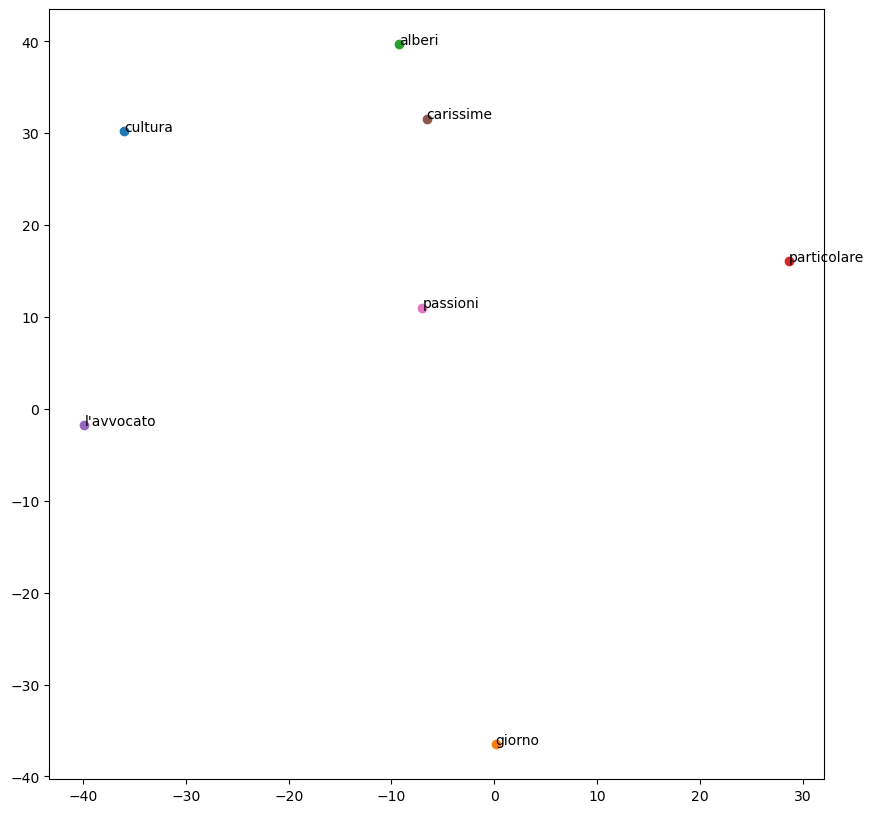

Cluster 1: ['ciò', 'grande', "l'importanza", 'presidente', 'detto', 'vero', 'creatività', 'dato', 'crisi']


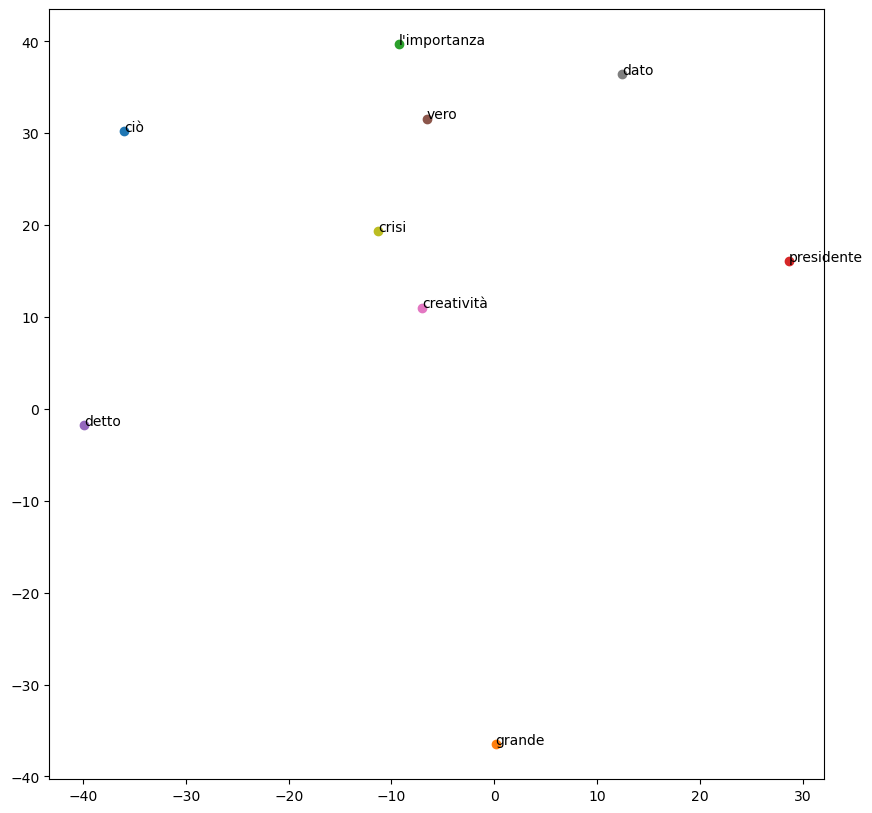

Cluster 2: ['liquido', 'acqua', 'corpo', 'rivista', 'esco', 'luoghi', 'egregio', 'passo', 'andrea', 'tristi', 'amici']


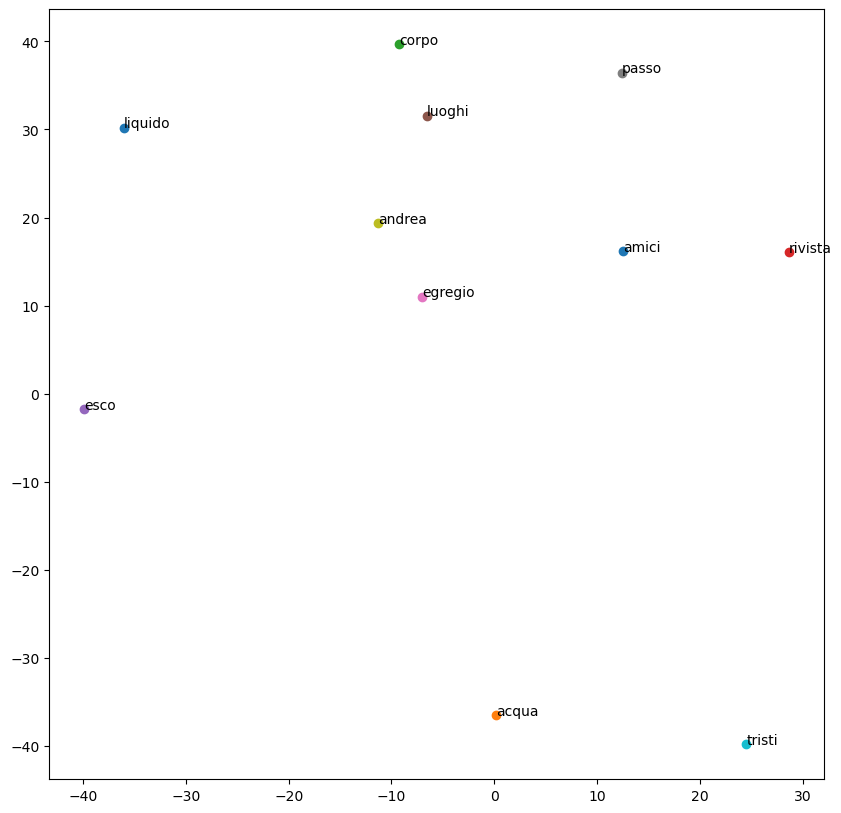

Cluster 3: ["l'acqua", 'così', 'quindi', "dell'imparare", 'nuovo', 'biennale', 'quando', 'ricordarsi', 'sottolineare', 'incantato', 'buttafuoco', 'pubblica', 'conclusa', 'direttore', 'carissimi']


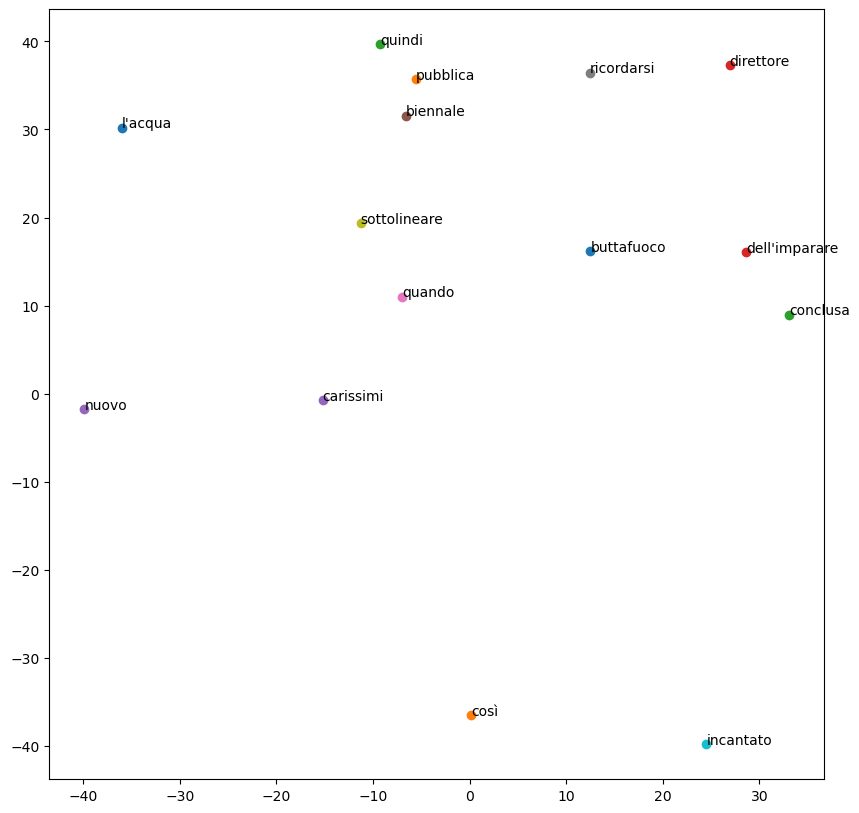

Cluster 4: ['’', "dell'acqua", 'dopo', 'storia', 'talmente', 'punto', 'estetica', 'po', 'problema', 'letteralmente', 'riferimento', "l'altro", 'mercato', 'presenti', 'formali']


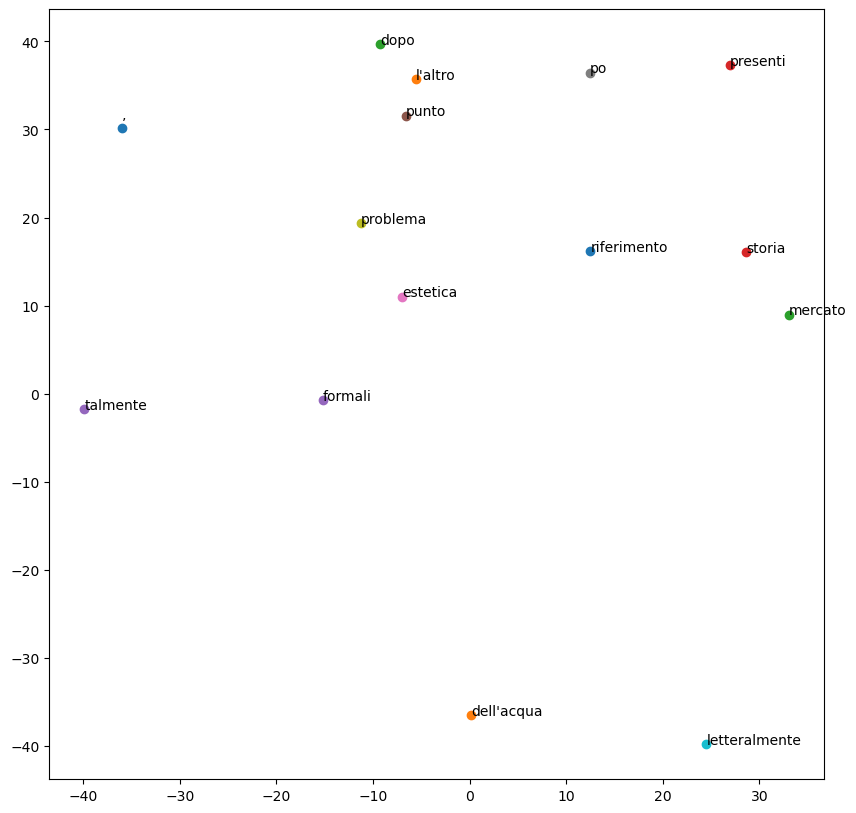

Cluster 5: ['pietrangelo', 'civiltà', 'grandissima']


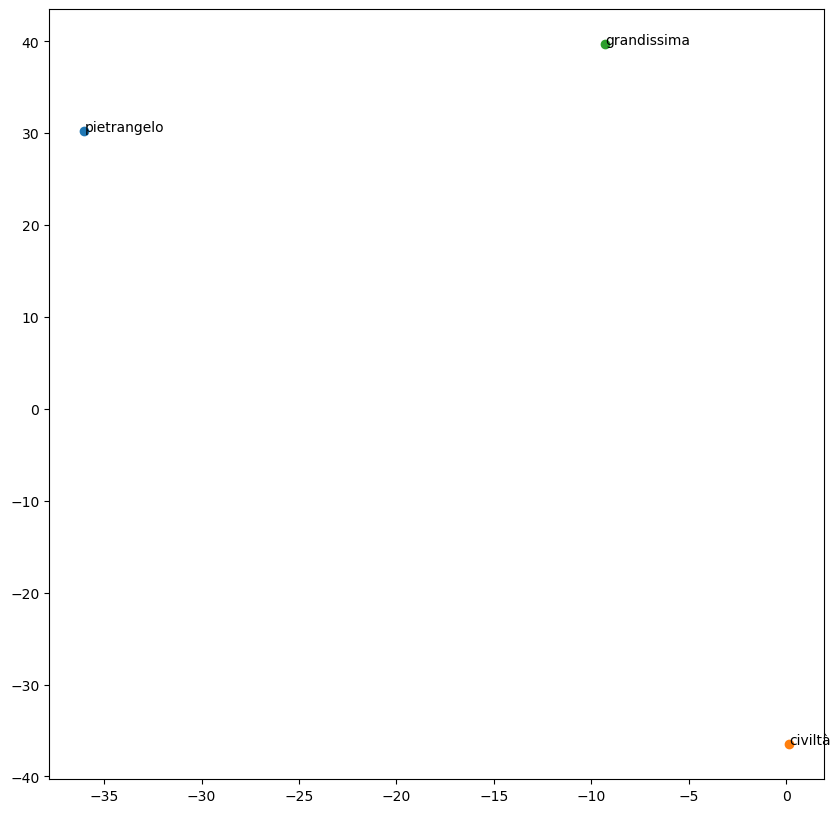

Cluster 6: ['amniotico', 'disidratano', 'prima', 'nasce', 'funzione', 'chaouni', 'aziza', "l'architetto", 'rossi', 'cuore', 'saluti', 'no', 'dimensione', 'accelerazioni']


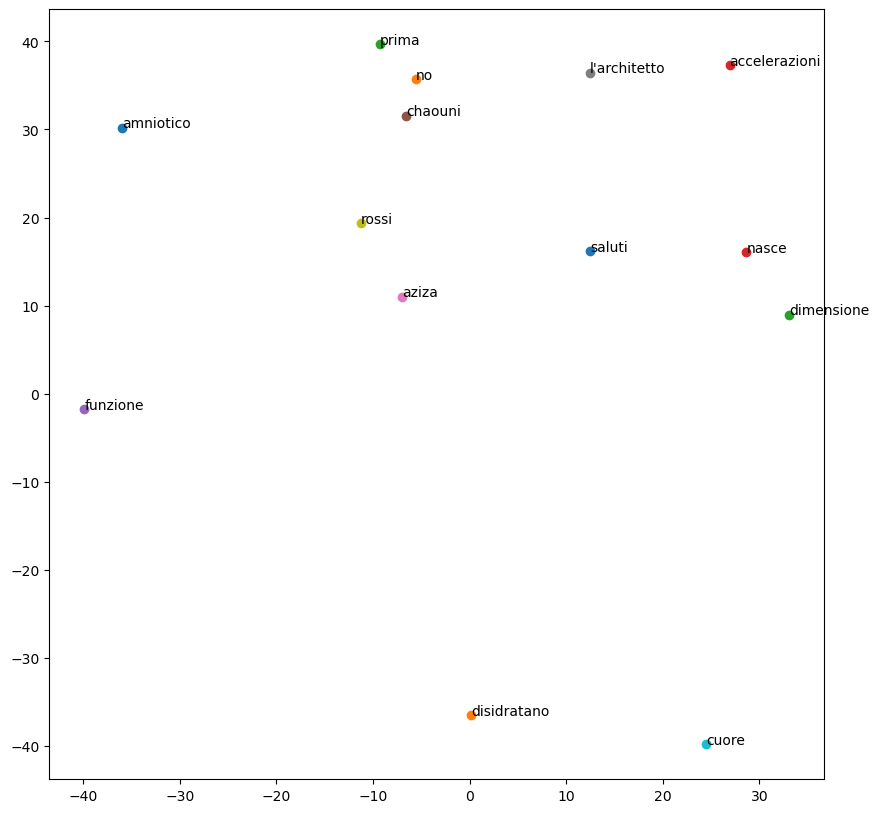

Cluster 7: ['può', 'persone', 'fa', 'rappresenta', "l'elemento", 'immaginare', 'protocollo', 'desertificazione']


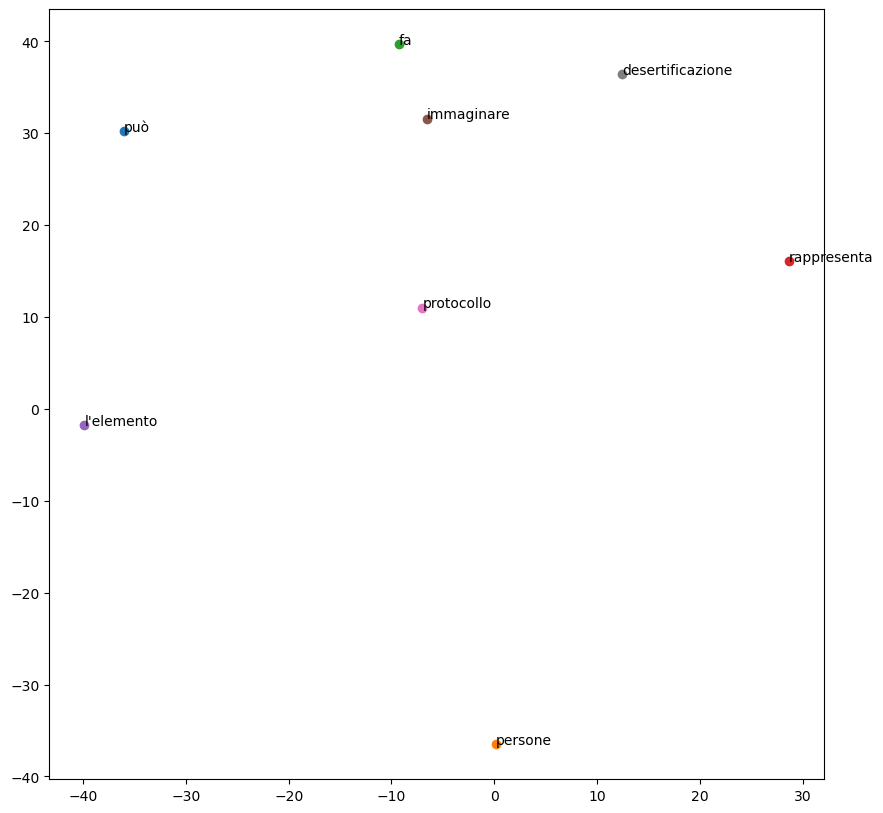

Cluster 8: ['qui', 'naturalmente', 'esempio', 'figli', 'tecnica', 'umano', 'innanzitutto', 'debora']


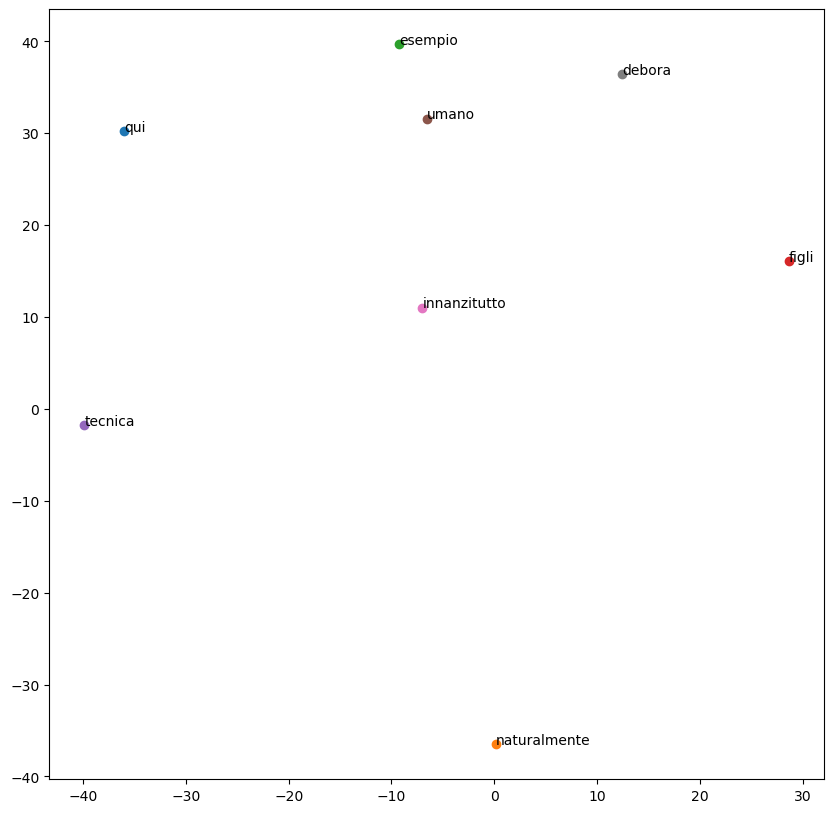

Cluster 9: ['venezia', 'cioè', 'attraverso', 'rivoluzione', 'saluto', 'ora', 'bellezza', 'lezione', 'mondo', 'trasporto']


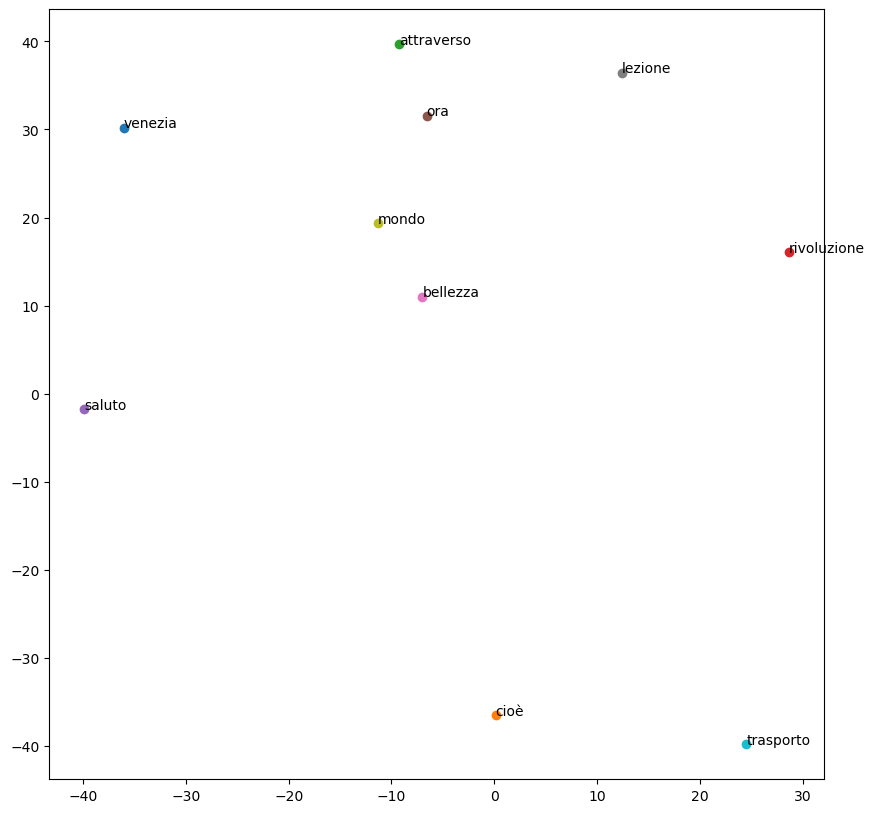

In [47]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Converti i vettori in un array NumPy
vettori_array = np.array(vettori)

# Riduzione dimensionale con t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=0)
vettori_ridotti = tsne.fit_transform(vettori_array)

# Visualizzazione
for cluster, parole in cluster_parole.items():
    print(f"Cluster {cluster}: {parole}")
    plt.figure(figsize=(10, 10))
    for i, parola in enumerate(parole):
        plt.scatter(vettori_ridotti[i, 0], vettori_ridotti[i, 1])
        plt.annotate(parola, (vettori_ridotti[i, 0], vettori_ridotti[i, 1]))
    plt.show()


In [48]:
import spacy
from gensim.models import Word2Vec

# Carica il modello di analisi sintattica di spaCy
nlp = spacy.load("it_core_news_sm")

# Testo di esempio
#testo = """
#La scienza avanza grazie a chi osa porre domande. Sebbene molti abbiano dubbi, 
#la ricerca continua a progredire. Quando scopriamo qualcosa di nuovo, 
#si apre un mondo di possibilità.
#"""

# 1. Analizza il testo con spaCy
doc = nlp(testo)

# 2. Identifica le subordinate
subordinate = [sent for sent in doc.sents if any(token.dep_ == "mark" for token in sent)]

# Stampa le subordinate e il loro conteggio
print("Subordinate trovate:")
for sub in subordinate:
    print(f"- {sub.text}")

print(f"Numero totale di subordinate: {len(subordinate)}")

# 3. (Facoltativo) Preprocessing per Word2Vec
tokens = [[token.text.lower() for token in sent if token.is_alpha] for sent in doc.sents]

# Allena Word2Vec
model = Word2Vec(tokens, vector_size=100, window=5, min_count=1, workers=4)

# Analizza il contesto delle parole nelle subordinate
for sub in subordinate:
    parole = [token.text.lower() for token in sub if token.text.lower() in model.wv]
    print(f"Parole nella subordinata '{sub.text}': {parole}")


Subordinate trovate:
- Comincio a leggere una parte un po’ più teoretica.
- La conoscenza è il proprio tempo appreso con il pensiero, ci si appresta a immaginare un orientamento per l’azione culturale nazionale non può che muovere dal prendere le misure di un mondo entrato nella dimensione compiuta, della tecnica e delle sue accelerazioni.
- Il movimento delle cose è così vorticoso e improvviso, così radicale nelle sue implicazioni e applicazioni che persino il sistema dei processi cognitivi delle persone, e non solo delle ultime generazioni, ha cominciato a mutare con esso.
- l’entusiasmo passivo che rimuove i pericoli della iper-tecnologizzazione, e per converso, l’apocalittismo difensivo che rimpiange un’immagine del mondo trascorsa impugnando un’ideologia della crisi che si percepisce come processo alla tecnica e al futuro intese come una minaccia.
- No
Sono letteralmente incantato da questa lezione, quindi esco un po dal protocollo, innanzitutto per sottolineare ciò che il Preside

In [51]:
import nltk

# Scarica le risorse necessarie
nltk.download('punkt')

# Tokenizza il testo in frasi
frasi = nltk.sent_tokenize(testo, language="italian")

# Stampa le lunghezze delle frasi
print("Lunghezze delle frasi:")
for frase in frasi:
    parole = nltk.word_tokenize(frase, language="italian")
    print(f"Frase: '{frase.strip()}' -> Lunghezza: {len(parole)} parole")

Lunghezze delle frasi:
Frase: 'Comincio a leggere una parte un po’ più teoretica.' -> Lunghezza: 11 parole
Frase: 'La conoscenza è il proprio tempo appreso con il pensiero, ci si appresta a immaginare un orientamento per l’azione culturale nazionale non può che muovere dal prendere le misure di un mondo entrato nella dimensione compiuta, della tecnica e delle sue accelerazioni.' -> Lunghezza: 47 parole
Frase: 'Il movimento delle cose è così vorticoso e improvviso, così radicale nelle sue implicazioni e applicazioni che persino il sistema dei processi cognitivi delle persone, e non solo delle ultime generazioni, ha cominciato a mutare con esso.' -> Lunghezza: 41 parole
Frase: 'Di fronte a questo cambiamento di paradigma, la quarta rivoluzione epocale della storia delineante un’ontologia intonata alla rivoluzione permanente dell’infosfera globale, il rischio che si corre è duplice e speculare: l’entusiasmo passivo che rimuove i pericoli della iper-tecnologizzazione, e per converso, l’apo

[nltk_data] Downloading package punkt to /home/acarugat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
